Importing data analysis libraries and visualizing libraries


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing train and test CSV files using pd.read_csv

In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C


In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


Data Visualization

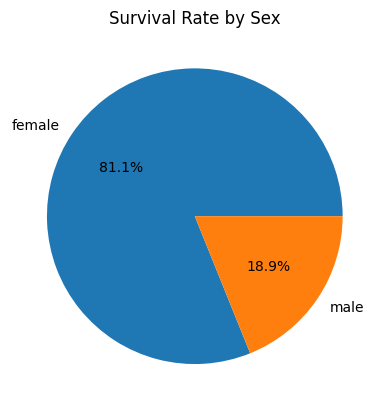

In [7]:
import matplotlib.pyplot as plt

survival_by_sex = train.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
plt.pie(survival_by_sex.iloc[1], labels=survival_by_sex.index, autopct="%1.1f%%")
plt.title("Survival Rate by Sex")
plt.show()

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


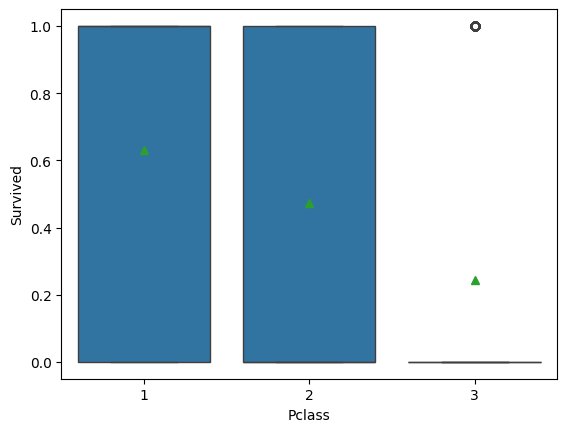

In [8]:
sns.boxplot(x="Pclass", y="Survived", showmeans=True, data=train)
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 1 who survived: 53.59%
Percentage of SibSp = 0 who survived: 34.54%
Percentage of SibSp = 3 who survived: 25.00%
Percentage of SibSp = 4 who survived: 16.67%
Percentage of SibSp = 2 who survived: 46.43%
Percentage of SibSp = 5 who survived: 0.00%
Percentage of SibSp = 8 who survived: 0.00%


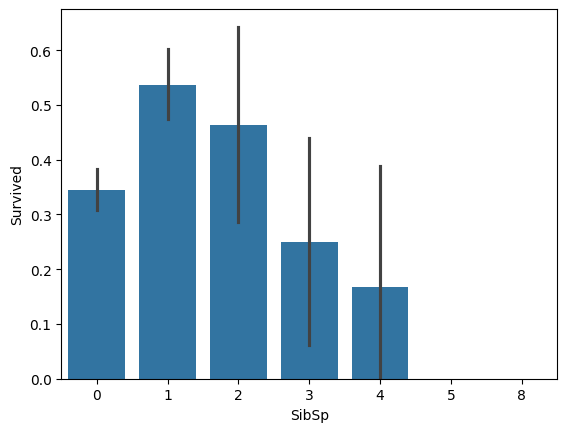

In [9]:
sns.barplot(x="SibSp", y="Survived", data=train)
unique_sibsp = train['SibSp'].unique()
percentage_survived = [f"Percentage of SibSp = {sibsp_value} who survived: {train['Survived'][train['SibSp'] == sibsp_value].value_counts(normalize=True).get(1, 0) * 100:.2f}%" for sibsp_value in unique_sibsp]
print('\n'.join(percentage_survived))



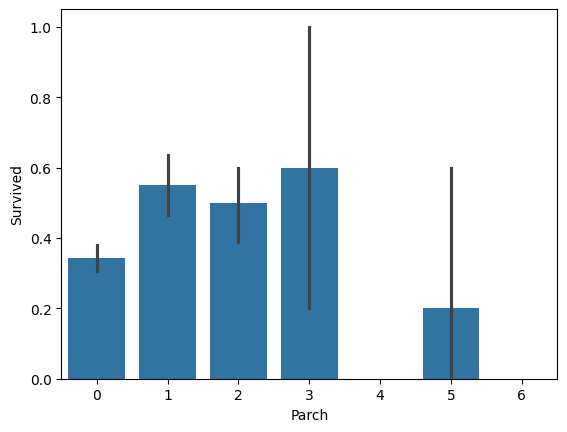

In [10]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [11]:
print('AgeGroup' in train.columns)


False


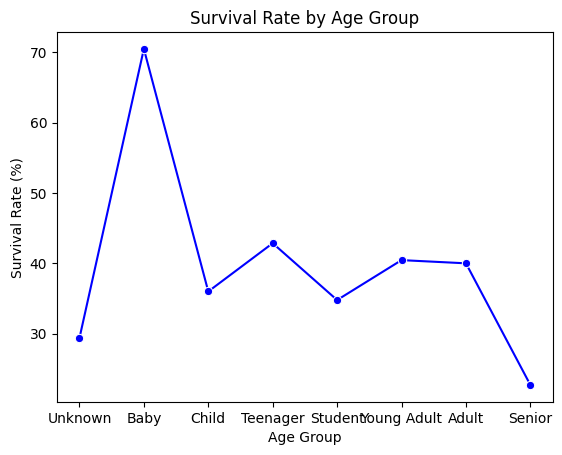

In [12]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)


bins = [-1, 0, 5, 12, 18, 24, 35, 60, float('inf')]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']


train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)


age_survival_rate = train.groupby('AgeGroup')['Survived'].mean() * 100


sns.lineplot(x=age_survival_rate.index, y=age_survival_rate.values, marker='o', color='blue')


plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group')


plt.show()



In [13]:
print('Cabin' in train.columns)


True


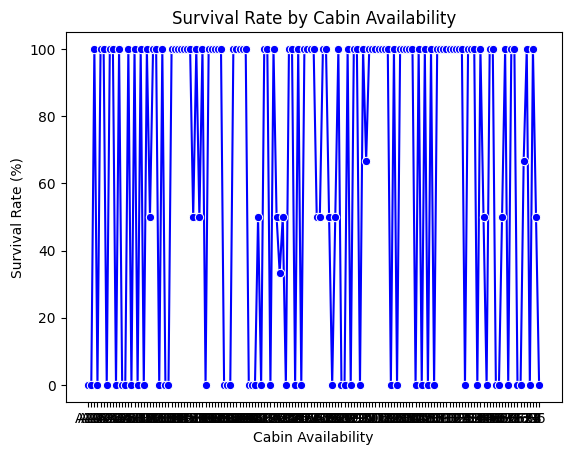

In [14]:
survival_rates = train.groupby('Cabin')['Survived'].mean() * 100

sns.lineplot(x=survival_rates.index, y=survival_rates.values, marker='o', color='blue')

plt.xlabel('Cabin Availability')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Cabin Availability')

plt.show()


Data Cleaning

In [15]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


Droping the Cabin and ticket feature

In [16]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [17]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [18]:

embarked_counts = train['Embarked'].value_counts()

embarked_counts_dict = {
    'Southampton (S)': embarked_counts.get('S', 0),
    'Cherbourg (C)': embarked_counts.get('C', 0),
    'Queenstown (Q)': embarked_counts.get('Q', 0)
}

for port, count in embarked_counts_dict.items():
    print(f"Number of people embarking in {port}: {count}")


Number of people embarking in Southampton (S): 644
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


In [19]:
train = train.fillna({"Embarked": "S"})

In [20]:
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
title_mapping = {
    'Lady': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare',
    'Countess': 'Royal',
    'Sir': 'Royal',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
}


for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping).fillna(dataset['Title'])

title_survival_rate = train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

print(title_survival_rate)



    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000


Map each of the title groups to a numerical value

In [22]:

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


Data filled is randomly predicited and fill missing age with mode age group for each title

In [23]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}


In [24]:
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [25]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()


train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [26]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [27]:
sex_mapping = {"male": 0, "female": 1}


train['Sex'] = train['Sex'].replace(sex_mapping)
test['Sex'] = test['Sex'].replace(sex_mapping)

# Display the first few rows of the modified DataFrame
print(train.head())


   PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked  \
0            1         0       3    0      1      0   7.2500        S   
1            2         1       1    1      1      0  71.2833        C   
2            3         1       3    1      0      0   7.9250        S   
3            4         1       1    1      1      0  53.1000        S   
4            5         0       3    0      0      0   8.0500        S   

   AgeGroup  Title  
0       4.0      1  
1       6.0      3  
2       5.0      2  
3       5.0      3  
4       5.0      1  


In [28]:

embarked_mapping = {"S": 1, "C": 2, "Q": 3}

# Replace the values in the 'Embarked' column using the embarked mapping dictionary
train['Embarked'] = train['Embarked'].replace(embarked_mapping)
test['Embarked'] = test['Embarked'].replace(embarked_mapping)

print(train.head())


   PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0      1      0   7.2500         1   
1            2         1       1    1      1      0  71.2833         2   
2            3         1       3    1      0      0   7.9250         1   
3            4         1       1    1      1      0  53.1000         1   
4            5         0       3    0      0      0   8.0500         1   

   AgeGroup  Title  
0       4.0      1  
1       6.0      3  
2       5.0      2  
3       5.0      3  
4       5.0      1  


In [29]:
# Impute missing Fare values in test set (assuming 'Fare' exists in train)
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x]
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)


if 'Fare' in train.columns:
    train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
if 'Fare' in test.columns:
    test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])


train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)


<ipython-input-29-85c09e77b70e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)


In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,4.0,1,1
1,2,1,1,1,1,0,2,6.0,3,4
2,3,1,3,1,0,0,1,5.0,2,2
3,4,1,1,1,1,0,1,5.0,3,4
4,5,0,3,0,0,0,1,5.0,1,2


Sklearn model

In [31]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy:",acc_randomforest)
print(classification_report(y_val, y_pred))

comparison_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print("Comparison:")
print(comparison_df)



Accuracy: 83.25
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       124
           1       0.76      0.79      0.78        73

    accuracy                           0.83       197
   macro avg       0.82      0.82      0.82       197
weighted avg       0.83      0.83      0.83       197

Comparison:
     Actual  Predicted
495       0          1
648       0          0
278       0          0
31        1          1
255       1          1
..      ...        ...
875       1          1
727       1          1
428       0          0
54        0          0
45        0          0

[197 rows x 2 columns]


In [33]:
print("Predicted:", y_pred)
print("Actual:", y_val)

Predicted: [1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 0]
Actual: 495    0
648    0
278    0
31     1
255    1
      ..
875    1
727    1
428    0
54     0
45     0
Name: Survived, Length: 197, dtype: int64
